# Optimize An Infinite-Dimensional Vector (aka. Function)
We can optimize a scalar function $f$ taking a vector $v$.
E.g.
$$
\begin{align*}
f(v)
&= \int^{2 \pi}_0 sin(v(x)) \ dx
\end{align*}
$$

The differential $df$ and the gradient $\nabla f$ are defined:
$$
\begin{align*}
df
&= f(v + dv) - f(v) \\
&= \langle \nabla f, dv \rangle
\end{align*}
$$

Let's find the gradient $\nabla f$:

$$
\begin{align*}
df
&= f(v + dv) - f(v) \\
&= \int_{\mathcal{B}} [sin(v(x) + dv(x)) - sin(v(x))] \ dx \\
&= \int_{\mathcal{B}} cos(v(x)) \ dv(x) \ dx \\
&= \langle cos(v(x)), dv(x) \rangle & \text{(bracket notation)}\\
\implies \nabla f &= cos(v(x))
\end{align*}
$$

# Plot $f(v)$

In [1]:
%%capture
import numpy as np
import matplotlib.pyplot as plt
import scipy

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4));

ys = np.linspace(-2 * np.pi, 2 * np.pi, 100)
sin = np.sin(ys)
ax1.plot(sin, ys, label="sin(y)")
v_line, = ax1.plot([], [], label="v(x)")
ax1.axhline(0, alpha=0.5)
ax1.legend(loc="upper left")
ax1.grid()
ax1.set_ylim((-2 * np.pi, 2 * np.pi))
ax1.set_xlim((-1, 2*np.pi + 1))
ax1.set_title("Element of the loss f(v)")

fp_line, = ax2.plot([], [], label="sin(v(x))")
f_line, = ax2.plot([], [], label="$\int$ sin(v(x)) dx")
f_scat = ax2.scatter([], [], color="red", label="Loss f(v)")
ax2.axhline(0, alpha=0.5)
ax2.legend(loc="upper left")
ax2.grid()
ax2.set_xlim((0, 2 * np.pi + 1))
ax2.set_ylim((-7, 7))

xs = np.linspace(0, 2 * np.pi, 100)

def draw(v: np.ndarray):
    v_fn = lambda xs: v

    v_line.set_xdata(xs)
    v_line.set_ydata(v)

    es = np.sin(v_fn(xs))
    fp_line.set_xdata(xs)
    fp_line.set_ydata(es)

    fs = scipy.integrate.cumulative_trapezoid(y=es, x=xs)
    f_line.set_xdata(xs[1:])
    f_line.set_ydata(fs)

    loss = fs[-1]
    f_scat.set_offsets(np.array([xs[-1], loss]))
    ax2.set_title(f"Loss $f(v)$={loss/np.pi:.2f}π")
    return [v_line, fp_line, f_line, f_scat]

def plot(v: np.ndarray):
    draw(v)
    return fig

Below I plot the integral $f(v)$ for an arbitrary function $v(x)$ (in this case an inverted parabola).

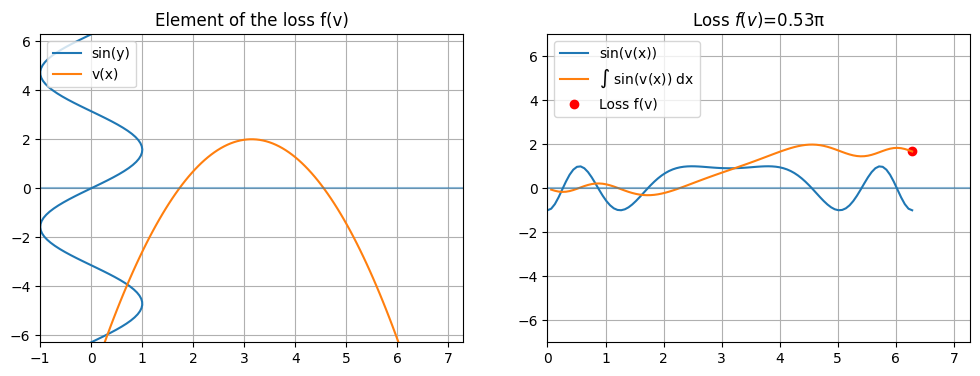

In [2]:
plot(-(xs - np.pi)**2 +2)

# Gradient Descent In Function Space

Since we know the gradient $\nabla f$, we can apply small steps to v, in the direction of the negative gradient to minimize $f(v)$.

In [3]:
v = -(xs - np.pi)**2 +2  # arbitrary initial function
n_iter = 150
fs = []
vs = []
for _ in range(n_iter):
    v_fn = lambda xs: v
    vs.append(v)
    f = scipy.integrate.trapezoid(y=np.sin(v_fn(xs)), x=xs)
    fs.append(f)
    grad = np.cos(v_fn(xs))
    v = v - 0.05 * grad

Below I plot the optimal function $v(x)$ that minimizes the $f(v)$:

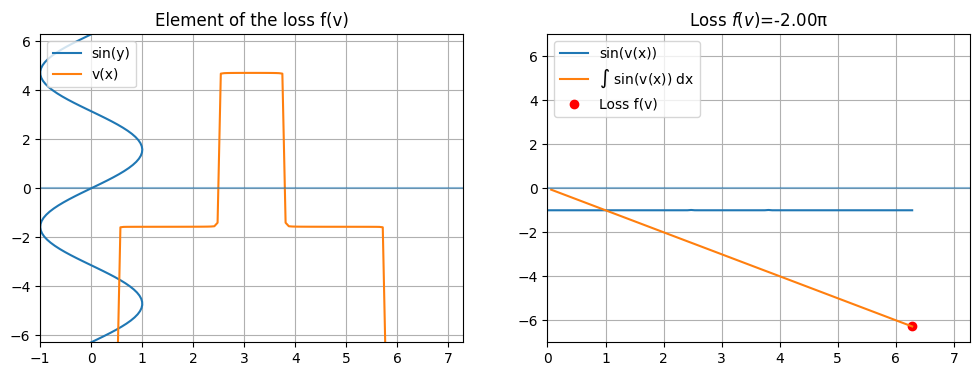

In [4]:
plot(vs[-1])

# Animate the Optimization

In [5]:
from matplotlib import animation
from IPython.display import HTML

def drawframe(n: int):
    v = vs[n]
    return draw(v)

anim = animation.FuncAnimation(fig, drawframe, frames=len(vs), interval=50, blit=True);

HTML(anim.to_html5_video())

In [6]:
anim.save("variational-opt.mp4")

# Appendix: 
## Integration By Parts
We can use integration by parts to get rid of $v'$:
$$
\begin{align*}
(u \cdot v)' &= u'v + v'u \\
\implies
u \cdot v |^a_b &= \int^a_b u' v \ dx + \int^a_b v' u \ dx \\
\implies
\int^a_b v' u \ dx &= u \cdot v |^a_b - \int^a_b u' v \ dx \\
<v', u> & = u \cdot v |^a_b - <u', v>
\end{align*}
$$

Assumging $u = cos$ and $v =v$:
$$
\begin{align*}
<v', cos> 
&= cos(x) v(x) |^{2 \pi}_0 - <-sin, v>  \\
&= cos(x) v(x) |^{2 \pi}_0 + <sin, v>
\end{align*}
$$